In [1]:
import glob
import os
import pandas as pd
import yaml
import sys
import matplotlib.pyplot as plt

from statsmodels.distributions.empirical_distribution import ECDF
from tqdm import tqdm

sys.path.append("../../../../utils")
from absolute_path_builder import AbsolutePathBuilder

In [2]:
%%script False
import seaborn as sns

sns.set()

Couldn't find program: 'False'


In [3]:
models = {
    "textblob_score": "Textblob",
    "flair_score": "Flair",
    "vader_score": "Vader",
    "perspective_score": "Perspective",
    "detoxify_original_score": "Detoxify",
    "detoxify_unbiased_score": "Detoxify Unbiased",
}

In [4]:
coraal_path = AbsolutePathBuilder.get_path(
    "05_coraal_features",
    filepaths="../../../../config/filepaths.yaml"
)

buckeye_path = AbsolutePathBuilder.get_path(
    "05_buckeye_features",
    filepaths="../../../../config/filepaths.yaml"
)

img_path = AbsolutePathBuilder.get_path(
    "buckeye_vs_coraal_imgs",
    filepaths="../../../../config/filepaths.yaml"
)

In [5]:
dfs = []

filenames = [file.split("/")[-1] for file in glob.glob(os.path.join(coraal_path, "*"))]
for file in tqdm(filenames):
    dfs.append(pd.read_csv(os.path.join(coraal_path, file)))

filenames = [file.split("/")[-1] for file in glob.glob(os.path.join(buckeye_path, "*"))]
for file in tqdm(filenames):
    dfs.append(pd.read_csv(os.path.join(buckeye_path, file)))
    
df = pd.concat(dfs).reset_index(drop=True)

100%|████████████████████████████████████████████████████████████████| 39/39 [00:00<00:00, 155.13it/s]


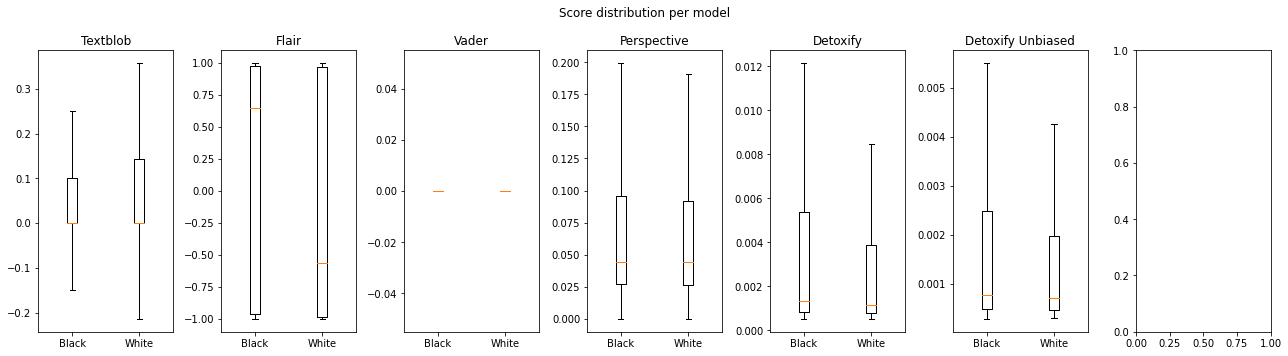

In [6]:
_, axs = plt.subplots(1, 7, figsize=(18,5))

for i, (col, model_name) in enumerate(models.items()):
    axs[i].boxplot(
        [
            df.loc[df.race == "Black", col].dropna(),
            df.loc[df.race == "White", col].dropna()
        ],
        showfliers=False,
        labels=["Black", "White"]
    )
    axs[i].set_title(f"{model_name}")

plt.suptitle("Score distribution per model")
plt.tight_layout()
plt.savefig(os.path.join(img_path, "score_dist.pdf"))

plt.show()

---
### Toxicity distribution with and without African American Terms

In [7]:
plt.rcParams['figure.figsize']  = (3.33, 5.5)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 24
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 3

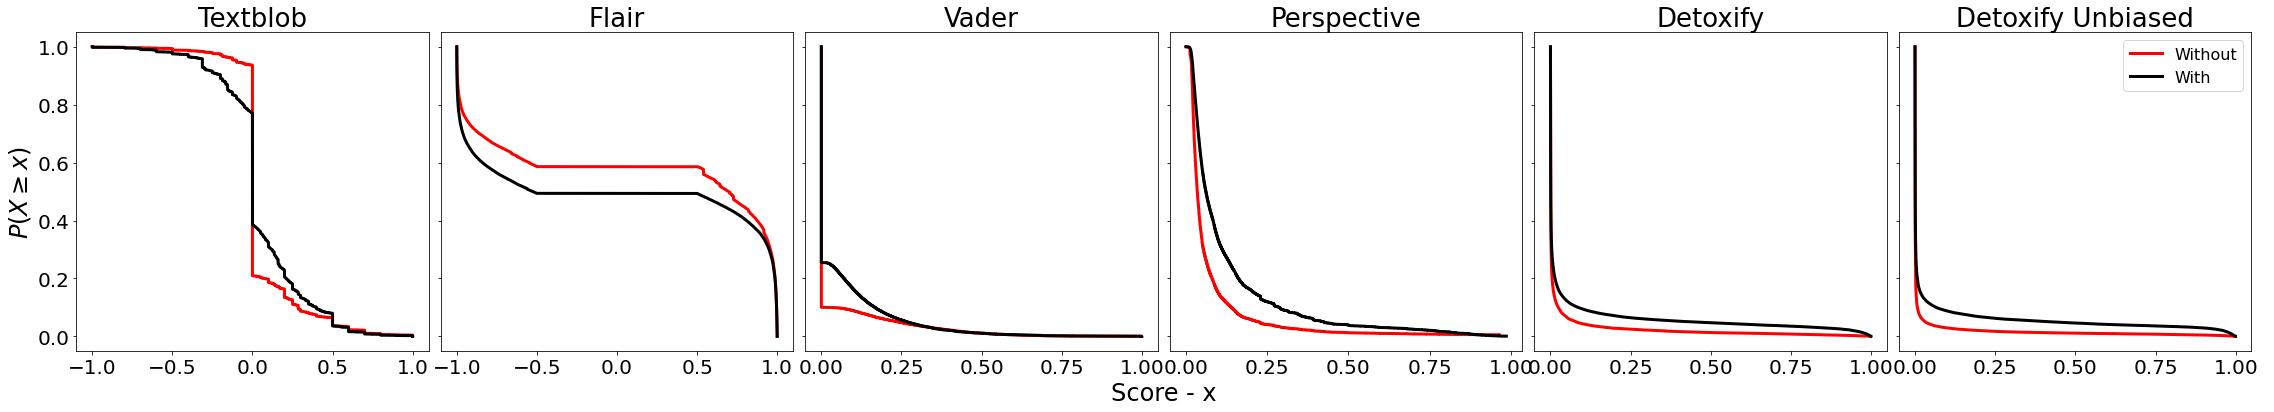

In [8]:
fig, axs = plt.subplots(1, 6, figsize=(32, 6), sharey=True)

for i, (col, model_name) in enumerate(models.items()):
    ecdf = ECDF(df.loc[df.AAE_TERMS_COUNT == 0, col])
    axs[i].plot(ecdf.x, 1-ecdf.y, label="Without", c="red")
    
    ecdf = ECDF(df.loc[df.AAE_TERMS_COUNT > 0, col])
    axs[i].plot(ecdf.x, 1-ecdf.y, label="With", c="black")
    
    axs[i].set_title(model_name, fontsize=26)
    
plt.legend()
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("Score - x", fontsize=24)
plt.ylabel(r"$P(X \geq x)$", fontsize=24)
plt.tight_layout(pad=0)
plt.savefig(
    os.path.join(
        AbsolutePathBuilder.get_path(
            "buckeye_vs_coraal_imgs",
            filepaths="../../../../config/filepaths.yaml"
        ),
        "buckeye_vs_coraal_w_wo_aae.pdf"
    )
)
plt.show()